In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
file = 'data/coverage/coverage_data/NVSG276HRD944800040956_100kb_bin_data.txt'

df = pd.read_csv(file, sep='\t', header=None)

df.columns = ["chrom", "start", "end", "raw_cov", "norm_cov", "gc_content",	"corrected_cov"]

df = df.iloc[1:]

print(df.shape)

df.head()


(27666, 7)


,chrom,start,end,raw_cov,norm_cov,gc_content,corrected_cov
1,1,100000,200000,151288,0.6040963550482836,0.33762,-0.0008979618087898225
2,1,200000,300000,115211,0.4600400901688687,0.15776,-0.0006838287104891614
3,1,300000,400000,138580,0.553353027884506,0.33081,-0.0008225341564571784
4,1,400000,500000,108017,0.43131428786982745,0.32381,-0.0006411291093811159
5,1,500000,600000,568156,2.2686595678362638,0.35177,-0.0033722594616545296


Estatísticas Descritivas Univariadas:
            raw_cov      norm_cov    gc_content  corrected_cov
count  2.766600e+04  27666.000000  27666.000000   27666.000000
mean   2.504369e+05      1.000000      0.397324      -0.000033
std    1.283569e+05      0.512532      0.084044       0.000229
min    0.000000e+00      0.000000      0.000000      -0.004078
25%    2.169465e+05      0.866272      0.368910       0.000003
50%    2.473520e+05      0.987682      0.396740       0.000004
75%    2.836805e+05      1.132743      0.435020       0.000004
max    1.724322e+07     68.852546      0.636300       0.000305


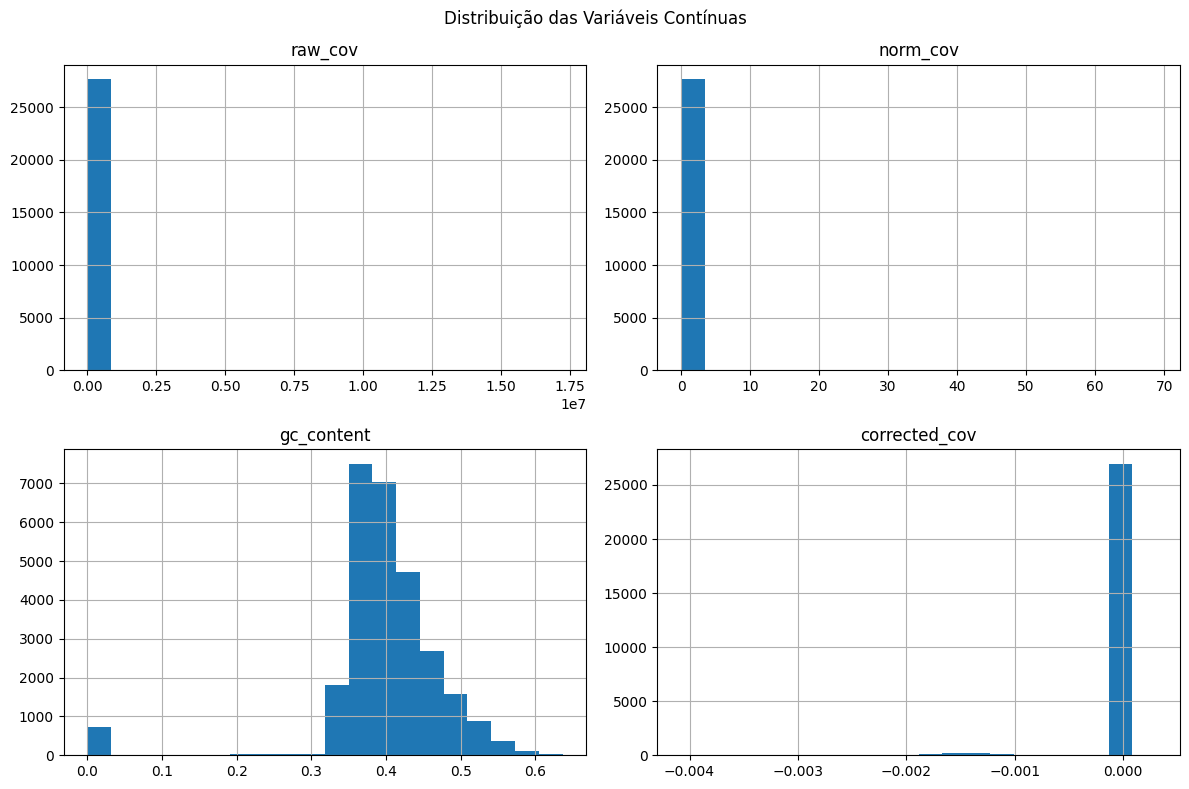


Matriz de Correlação:
                  chrom     start       end   raw_cov  norm_cov  gc_content  \
chrom          1.000000 -0.485343 -0.485343 -0.145855 -0.145855   -0.022070   
start         -0.485343  1.000000  1.000000  0.111752  0.111752    0.082347   
end           -0.485343  1.000000  1.000000  0.111752  0.111752    0.082347   
raw_cov       -0.145855  0.111752  0.111752  1.000000  1.000000    0.179983   
norm_cov      -0.145855  0.111752  0.111752  1.000000  1.000000    0.179983   
gc_content    -0.022070  0.082347  0.082347  0.179983  0.179983    1.000000   
corrected_cov  0.211515  0.114225  0.114225  0.014837  0.014837   -0.087231   

               corrected_cov  
chrom               0.211515  
start               0.114225  
end                 0.114225  
raw_cov             0.014837  
norm_cov            0.014837  
gc_content         -0.087231  
corrected_cov       1.000000  


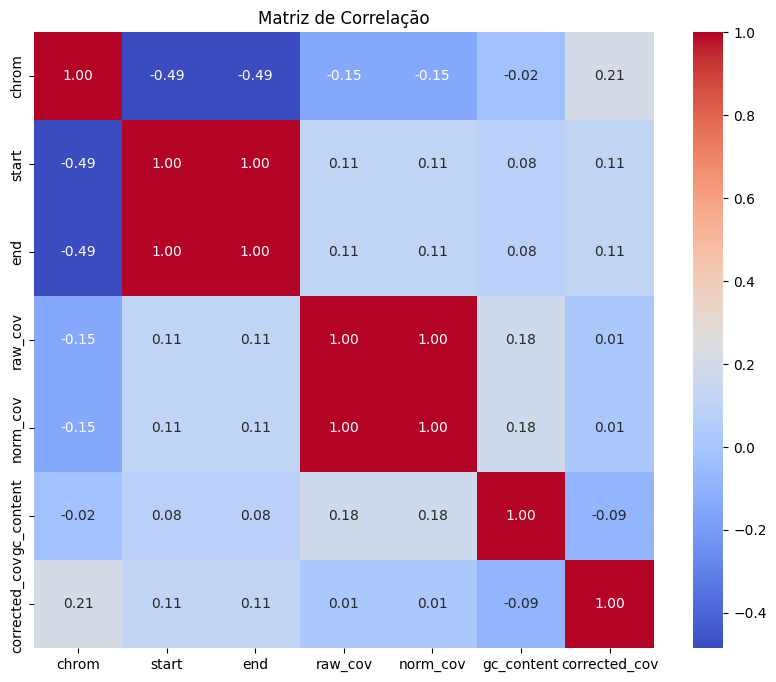

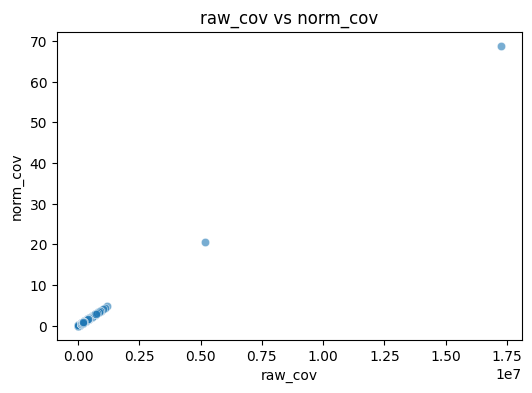

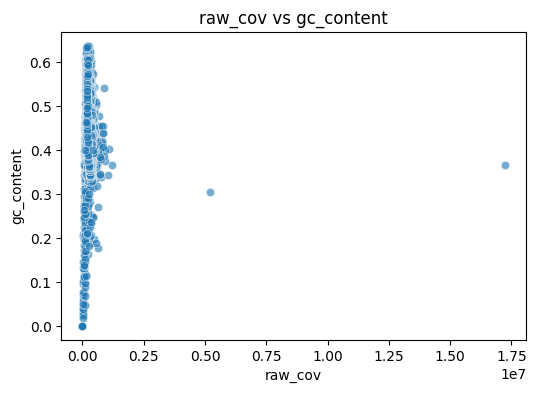

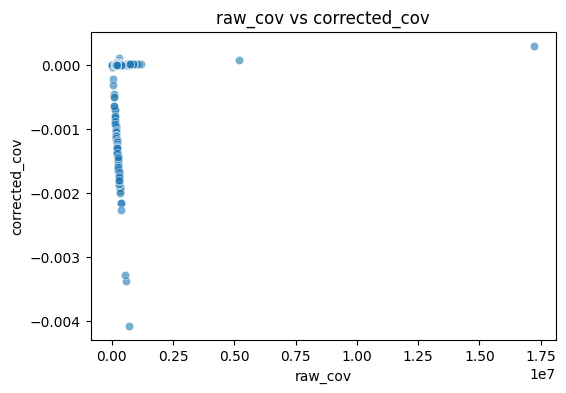

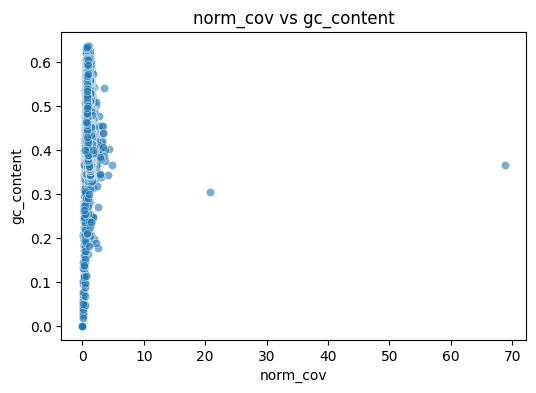

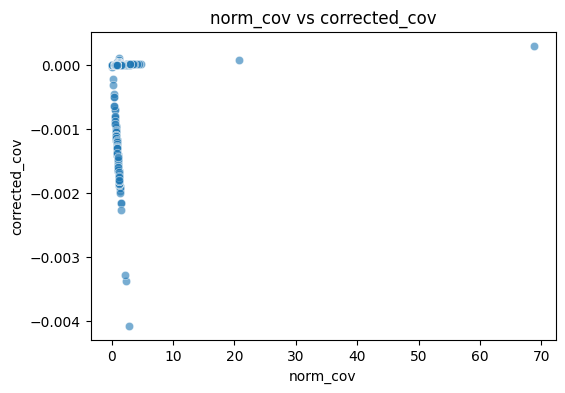

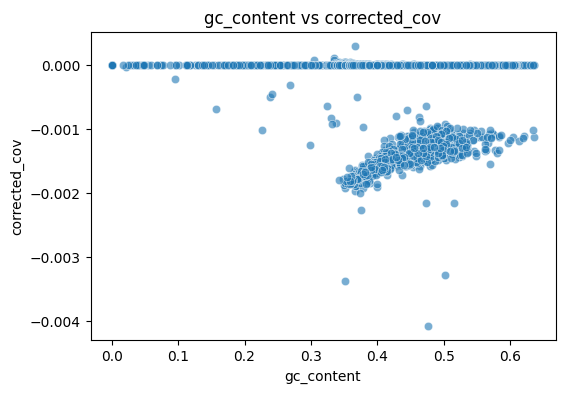

In [7]:
df["raw_cov"] = pd.to_numeric(df["raw_cov"])
df["norm_cov"] = pd.to_numeric(df["norm_cov"])
df["gc_content"] = pd.to_numeric(df["gc_content"])
df["corrected_cov"] = pd.to_numeric(df["corrected_cov"])

# Análise descritiva univariada
print("Estatísticas Descritivas Univariadas:")
print(df.describe())

# Visualizações Univariadas
df[['raw_cov', 'norm_cov', 'gc_content', 'corrected_cov']].hist(bins=20, figsize=(12, 8))
plt.suptitle("Distribuição das Variáveis Contínuas")
plt.tight_layout()
plt.show()

# Análise bivariada: Correlação
correlation_matrix = df.corr()
print("\nMatriz de Correlação:")
print(correlation_matrix)

# Heatmap de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

# Scatterplots para relações entre variáveis
scatter_cols = ['raw_cov', 'norm_cov', 'gc_content', 'corrected_cov']
for i, col1 in enumerate(scatter_cols):
    for j, col2 in enumerate(scatter_cols):
        if i < j:
            plt.figure(figsize=(6, 4))
            sns.scatterplot(x=df[col1], y=df[col2], alpha=0.6)
            plt.title(f"{col1} vs {col2}")
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.show()
